<a href="https://colab.research.google.com/github/NordstromBorup/hello-world/blob/master/LR_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
np.random.seed(1)

In [0]:
X = np.array([[0,1,0],
              [1,0,0],
              [1,1,1],
              [0,1,1]])

In [37]:
X

array([[0, 1, 0],
       [1, 0, 0],
       [1, 1, 1],
       [0, 1, 1]])

In [0]:
y = np.array([[0,1,1,0]]).T

In [39]:
y

array([[0],
       [1],
       [1],
       [0]])

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Alle vægte (W og b) skal have en startværdi. Her giver vi W en random værdi mellem -1 og 1 - mens b sættes til 0.

In [0]:

W = 2*np.random.random((3,1)) - 1
b = 0

In [42]:
W

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

In [43]:
b

0

Værdierne af vores funktion gemmes i en array (z).

In [0]:
z = X.dot(W) + b

In [45]:
z

array([[ 0.44064899],
       [-0.16595599],
       [-0.72507825],
       [-0.55912226]])

Herefter sendes værdierne gennem en sigmoid funktion for at begrænse udfaldsrummet til at være mellem 0 og 1.

In [0]:
A = sigmoid(z)

In [47]:
A

array([[0.60841366],
       [0.45860596],
       [0.3262757 ],
       [0.36375058]])

For at kunne beregne hvor godt det initiale gæt er bruges vores 'tabsfunktion'

In [0]:
def bce_loss(y,y_hat):
    N = y.shape[0]
    loss = -1/N * np.sum((y*np.log(y_hat) + (1 - y)*np.log(1-y_hat)))
    return loss

In [0]:
loss = bce_loss(y,A)

In [50]:
print (loss)

0.8223225820877986


In [0]:
alpha = 1
epochs = 20

In [0]:
N = y.shape[0]
losses = []

In [53]:
for i in range(epochs):
    # Forward pass
    z = X.dot(W) + b 
    A = sigmoid(z)
    
    # Calculate loss
    loss = bce_loss(y,A)
    print('Epoch:',i,'Loss:',loss)
    losses.append(loss)
    
    # Calculate derivatives
    dz = (A - y)
    dW = 1/N * np.dot(X.T,dz)
    db = 1/N * np.sum(dz,axis=0,keepdims=True)    
    
    # Parameter updates
    W -= alpha * dW
    b -= alpha * db

Epoch: 0 Loss: 0.8223225820877986
Epoch: 1 Loss: 0.7228974481248197
Epoch: 2 Loss: 0.6468376512082379
Epoch: 3 Loss: 0.5841161222414706
Epoch: 4 Loss: 0.5309081610241326
Epoch: 5 Loss: 0.4852371787200559
Epoch: 6 Loss: 0.4457477501179715
Epoch: 7 Loss: 0.41139116414773486
Epoch: 8 Loss: 0.3813260937620897
Epoch: 9 Loss: 0.3548699981270737
Epoch: 10 Loss: 0.33146603610936654
Epoch: 11 Loss: 0.31065770214125676
Epoch: 12 Loss: 0.29206886323178305
Epoch: 13 Loss: 0.2753879903521693
Epoch: 14 Loss: 0.26035569591451885
Epoch: 15 Loss: 0.24675486898129195
Epoch: 16 Loss: 0.23440284462420913
Epoch: 17 Loss: 0.22314516463044204
Epoch: 18 Loss: 0.21285058466964538
Epoch: 19 Loss: 0.20340706040115034


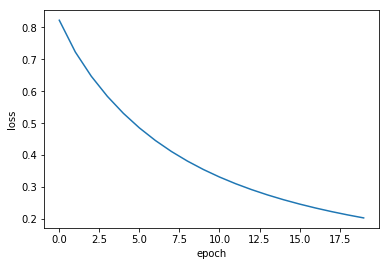

In [54]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()